In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 

In [2]:
df = pd.read_csv('./data/2021_Owning_Pets.csv',encoding = 'euc-kr')

In [3]:
df

,행정구역별(시도),거처의 종류별,가구-계,반려동물미보유가구-계,반려동물보유가구-계,개,고양이,기타,계
0,전국,계,20926710,17797748,3128962,2268514,571045,131440,2970999
1,전국,주택,19841582,16863160,2978422,2163026,538880,127728,2829634
2,전국,단독주택,6352065,5293111,1058954,809962,152282,24574,986818
3,전국,아파트,10782182,9276293,1505889,1060862,300413,86783,1448058
4,전국,연립주택,441888,377178,64710,46136,12983,2747,61866
...,...,...,...,...,...,...,...,...,...
139,제주특별자치도,아파트,67407,59136,8271,5553,1925,448,7926
140,제주특별자치도,연립주택,23014,20134,2880,2043,567,151,2761
141,제주특별자치도,다세대주택,27771,24004,3767,2697,780,167,3644
142,제주특별자치도,비거주용 건물 내 주택,7523,6229,1294,955,213,53,1221


In [4]:
#데이터 요약

In [5]:
df.describe()

,가구-계,반려동물미보유가구-계,반려동물보유가구-계,개,고양이,기타,계
count,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,144.000000,144.000000,1.440000e+02
mean,8.568750e+05,7.285924e+05,1.282826e+05,9.305631e+04,23346.805556,5425.111111,1.218282e+05
std,2.654264e+06,2.257202e+06,3.978601e+05,2.883900e+05,72758.402107,17473.132281,3.781650e+05
min,8.500000e+02,7.490000e+02,8.700000e+01,5.100000e+01,11.000000,5.000000,7.000000e+01
25%,1.990350e+04,1.664950e+04,2.747500e+03,2.043750e+03,488.250000,73.500000,2.645750e+03
50%,1.937585e+05,1.600410e+05,2.624500e+04,1.869900e+04,5285.500000,984.500000,2.513450e+04
75%,6.455382e+05,5.483092e+05,1.053770e+05,7.595600e+04,16091.000000,3659.500000,9.982225e+04
max,2.092671e+07,1.779775e+07,3.128962e+06,2.268514e+06,571045.000000,131440.000000,2.970999e+06


In [6]:
#서울 데이터 보기 

In [7]:
df.loc[df['행정구역별(시도)'] == '서울특별시',]

,행정구역별(시도),거처의 종류별,가구-계,반려동물미보유가구-계,반려동물보유가구-계,개,고양이,기타,계
8,서울특별시,계,3982290,3484177,498113,344419,110065,24800,479284
9,서울특별시,주택,3683785,3210628,473157,329287,101917,23999,455203
10,서울특별시,단독주택,1039703,924353,115350,78672,27705,4577,110954
11,서울특별시,아파트,1713267,1486541,226726,161691,42626,13708,218025
12,서울특별시,연립주택,104234,88356,15878,11151,3368,779,15298
13,서울특별시,다세대주택,748187,641369,106818,72114,26253,4538,102905
14,서울특별시,비거주용 건물 내 주택,78394,70009,8385,5659,1965,397,8021
15,서울특별시,주택이외의 거처,298505,273549,24956,15132,8148,801,24081


In [8]:
#서울 주택별(거처별) 애완동물보유현황?

In [9]:
df2 = df[(df['행정구역별(시도)'] == '서울특별시') & (df['거처의 종류별'].str.contains('주택'))]

In [10]:
df2

,행정구역별(시도),거처의 종류별,가구-계,반려동물미보유가구-계,반려동물보유가구-계,개,고양이,기타,계
9,서울특별시,주택,3683785,3210628,473157,329287,101917,23999,455203
10,서울특별시,단독주택,1039703,924353,115350,78672,27705,4577,110954
12,서울특별시,연립주택,104234,88356,15878,11151,3368,779,15298
13,서울특별시,다세대주택,748187,641369,106818,72114,26253,4538,102905
14,서울특별시,비거주용 건물 내 주택,78394,70009,8385,5659,1965,397,8021
15,서울특별시,주택이외의 거처,298505,273549,24956,15132,8148,801,24081


In [11]:
df2.loc[:,'개']

9     329287
10     78672
12     11151
13     72114
14      5659
15     15132
Name: 개, dtype: int64

In [12]:
#전국의 계를 구함 

In [45]:
df3 = df[(df['거처의 종류별'] == '계' )& (df['행정구역별(시도)'] != '전국' )]

In [46]:
df3

,행정구역별(시도),거처의 종류별,가구-계,반려동물미보유가구-계,반려동물보유가구-계,개,고양이,기타,계
8,서울특별시,계,3982290,3484177,498113,344419,110065,24800,479284
16,부산광역시,계,1405037,1220755,184282,129190,39051,8138,176379
24,대구광역시,계,985816,865720,120096,86371,23450,5560,115381
32,인천광역시,계,1147200,952813,194387,143348,34515,7549,185412
40,광주광역시,계,599217,524718,74499,52779,15487,3138,71404
48,대전광역시,계,631208,551052,80156,56910,16081,4047,77038
56,울산광역시,계,444087,384845,59242,41040,12425,2926,56391
64,세종특별자치시,계,139106,120612,18494,12641,3557,1144,17342
72,경기도,계,5098431,4236258,862173,623960,157807,38411,820178
80,강원도,계,661039,547395,113644,86273,16121,3527,105921


In [15]:
#전국 고양이 수 

In [16]:
df3[['행정구역별(시도)','고양이']]

,행정구역별(시도),고양이
8,서울특별시,110065
16,부산광역시,39051
24,대구광역시,23450
32,인천광역시,34515
40,광주광역시,15487
48,대전광역시,16081
56,울산광역시,12425
64,세종특별자치시,3557
72,경기도,157807
80,강원도,16121


In [49]:
df3

,행정구역별(시도),거처의 종류별,가구-계,반려동물미보유가구-계,반려동물보유가구-계,개,고양이,기타,계
8,서울특별시,계,3982290,3484177,498113,344419,110065,24800,479284
16,부산광역시,계,1405037,1220755,184282,129190,39051,8138,176379
24,대구광역시,계,985816,865720,120096,86371,23450,5560,115381
32,인천광역시,계,1147200,952813,194387,143348,34515,7549,185412
40,광주광역시,계,599217,524718,74499,52779,15487,3138,71404
48,대전광역시,계,631208,551052,80156,56910,16081,4047,77038
56,울산광역시,계,444087,384845,59242,41040,12425,2926,56391
64,세종특별자치시,계,139106,120612,18494,12641,3557,1144,17342
72,경기도,계,5098431,4236258,862173,623960,157807,38411,820178
80,강원도,계,661039,547395,113644,86273,16121,3527,105921


In [62]:
my_order = df3['행정구역별(시도)'].value_counts().index

In [69]:
df3[['행정구역별(시도)','반려동물보유가구-계']]

,행정구역별(시도),반려동물보유가구-계
8,서울특별시,498113
16,부산광역시,184282
24,대구광역시,120096
32,인천광역시,194387
40,광주광역시,74499
48,대전광역시,80156
56,울산광역시,59242
64,세종특별자치시,18494
72,경기도,862173
80,강원도,113644


In [71]:
df['행정구역별(시도)'].unique()

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [78]:
df[ ['개','고양이','기타'] ]

,개,고양이,기타
0,2268514,571045,131440
1,2163026,538880,127728
2,809962,152282,24574
3,1060862,300413,86783
4,46136,12983,2747
...,...,...,...
139,5553,1925,448
140,2043,567,151
141,2697,780,167
142,955,213,53


C:\Users\4005\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\4005\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\4005\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\4005\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\4005\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\4005\anaconda3\Lib\s

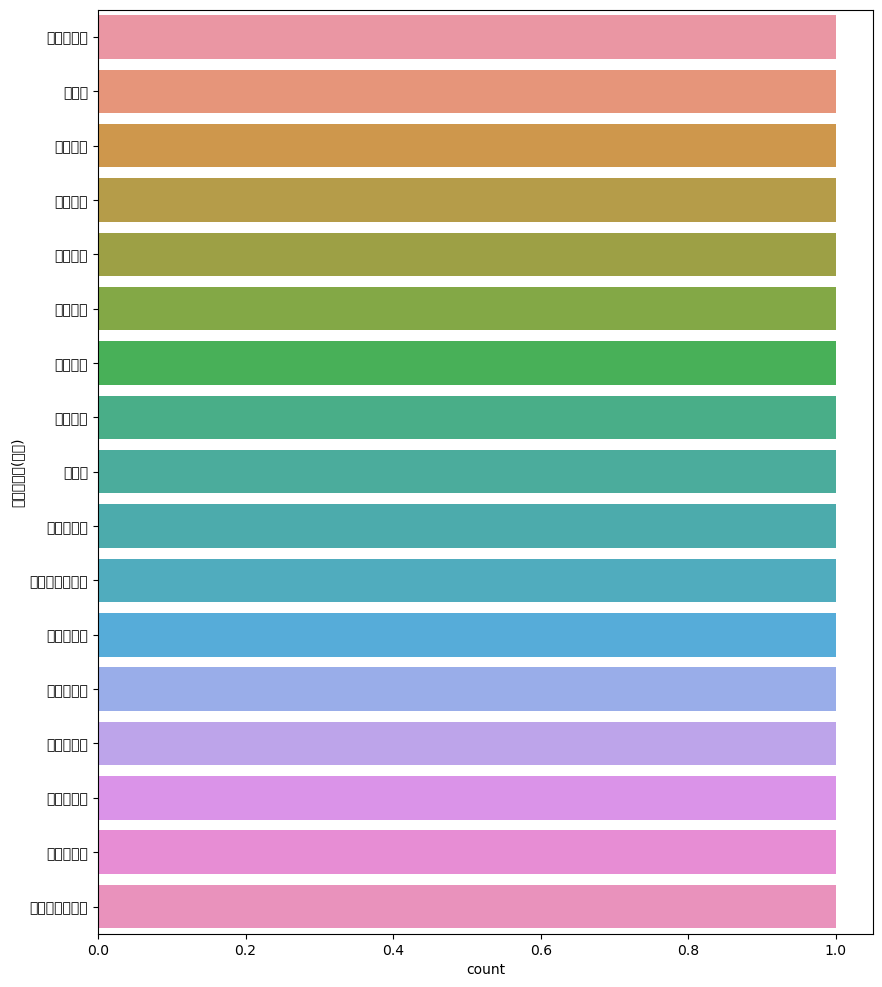

In [68]:
plt.figure(figsize=(10,12))
sb.countplot(data = df3[['행정구역별(시도)','반려동물보유가구-계']], y='행정구역별(시도)',order= my_order)
plt.show()

In [17]:
#전국 고양이가 제일 많은 지역은 ?

In [31]:
df3.loc[ df3['개'] == df3['개'].max()]

,행정구역별(시도),거처의 종류별,가구-계,반려동물미보유가구-계,반려동물보유가구-계,개,고양이,기타,계
72,경기도,계,5098431,4236258,862173,623960,157807,38411,820178


In [18]:
df3.loc[ df3['고양이'] == df3['고양이'].max() ,['행정구역별(시도)','고양이' ]]

,행정구역별(시도),고양이
72,경기도,157807


In [19]:
#서울의 반려동물을 키우고 있는 비율 

In [20]:
#  percent = (( 일부 / 전체 값  * 100.0))

In [21]:
pet_owner= df3.loc[df['행정구역별(시도)'] == '서울특별시','반려동물보유가구-계'].sum()

In [22]:
not_pet_owner= df3.loc[df['행정구역별(시도)'] == '서울특별시','반려동물미보유가구-계'].sum()

In [23]:
pet_owner

498113

In [24]:
not_pet_owner

3484177

In [25]:
percent = (( pet_owner / not_pet_owner  * 100.0))

In [26]:
percent

14.296432127300077

In [27]:
#상관 계수  (반려동물보유 )

In [28]:
df[['반려동물보유가구-계','개']].corr()

,반려동물보유가구-계,개
반려동물보유가구-계,1.000000,0.999828
개,0.999828,1.000000
